In [1]:
import os
os.chdir("/Users/xinhaoliu/Desktop/Research/Code/paste")

import scanpy as sc
import matplotlib.pyplot as plt

from src.paste.fractional_align import partial_pairwise_align_given_cost_matrix
from src.paste.helper import intersect, to_dense_array, extract_data_matrix, glmpca_distance
from convex_hull import convex_hull_area

%load_ext autoreload
%autoreload 2

In [2]:
def plot_area_curve(m_list, source_area_list, target_area_list):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(m_list, source_area_list)
    ax1.set_xlim(1, 0)
    ax1.set_xticks([0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    ax1.set_xlabel('m')
    ax1.set_ylabel('Area')
    ax1.set_title('Source slice')
    
    fig, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(m_list, target_area_list)
    ax2.set_xlim(1, 0)
    ax2.set_xticks([0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    ax2.set_xlabel('m')
    ax2.set_ylabel('Area')
    ax2.set_title('Target slice')
    
    plt.show()

In [ ]:
***
151673_00 - 151674_10
m=0.5
***

In [2]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=8.0549E+6
Iteration: 1 | deviance=8.0545E+6
Iteration: 2 | deviance=7.0620E+6
Iteration: 3 | deviance=6.8265E+6
Iteration: 4 | deviance=6.7335E+6
Iteration: 5 | deviance=6.6912E+6
Iteration: 6 | deviance=6.6668E+6
Iteration: 7 | deviance=6.6505E+6
Iteration: 8 | deviance=6.6387E+6
Iteration: 9 | deviance=6.6296E+6
Iteration: 10 | deviance=6.6223E+6
Iteration: 11 | deviance=6.6163E+6
Iteration: 12 | deviance=6.6114E+6
Iteration: 13 | deviance=6.6072E+6
Iteration: 14 | deviance=6.6037E+6
Iteration: 15 | deviance=6.6006E+6
Iteration: 16 | deviance=6.5980E+6
Iteration: 17 | deviance=6.5956E+6
Iteration: 18 | deviance=6.5935E+6
Iteration: 19 | deviance=6.5917E+6
Iteration: 20 | deviance=6.5900E+6
Iteration: 21 | deviance=6.5885E+6
Iteration: 22 | deviance=6.5871E+6
Iteration: 23 | deviance=6.5858E+6
Iteration: 24 | deviance=6.5847E+6
Iteration: 25 | deviance=6.5836E+6
Iteration: 26 | deviance=6.5827E+6
Iteration: 27 | deviance=6.5818E+6
Iteration:

m = 0.99
m = 0.95
m = 0.9
m = 0.85
m = 0.8
m = 0.75
m = 0.7
m = 0.65
m = 0.6
m = 0.55
m = 0.5
m = 0.45
m = 0.4
m = 0.35
m = 0.3
m = 0.25
m = 0.2
m = 0.15
m = 0.1
m = 0.05


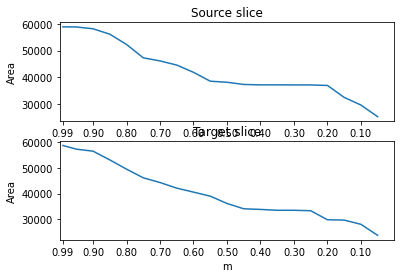

In [11]:
sliceA_areas = []
sliceB_areas = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    print("m = " + str(m))
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)

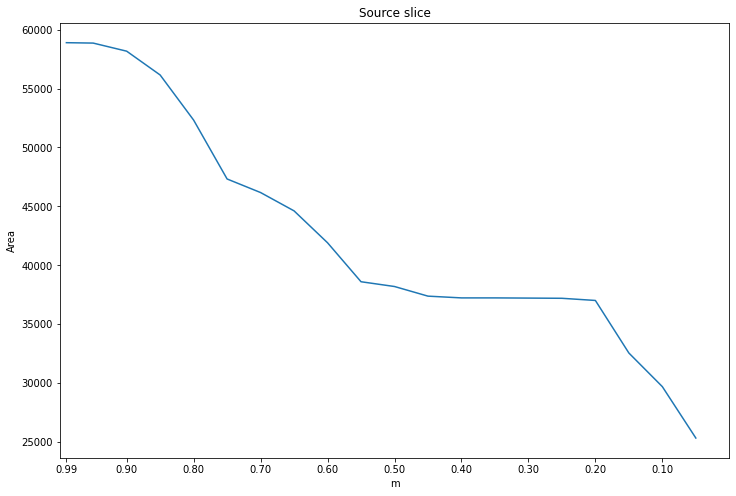

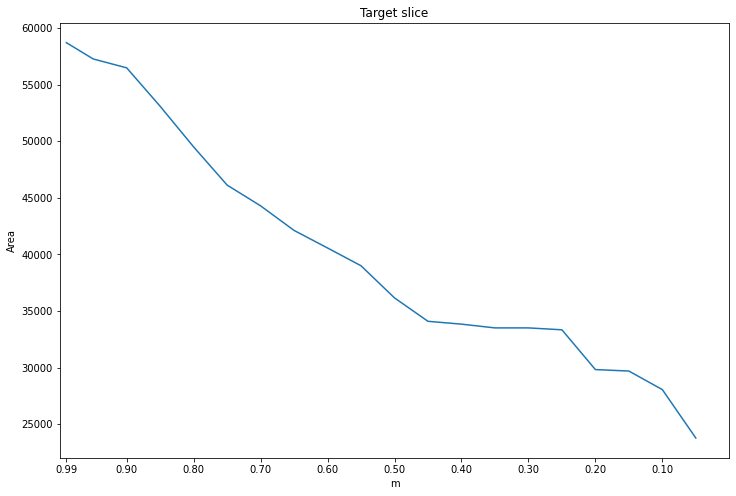

In [33]:
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)

In [ ]:
***
151673_00 - 151674_10
m=0.7
***

In [34]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]pca
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.1096E+7
Iteration: 1 | deviance=1.1095E+7
Iteration: 2 | deviance=9.7042E+6
Iteration: 3 | deviance=9.4222E+6
Iteration: 4 | deviance=9.3076E+6
Iteration: 5 | deviance=9.2469E+6
Iteration: 6 | deviance=9.2123E+6
Iteration: 7 | deviance=9.1894E+6
Iteration: 8 | deviance=9.1732E+6
Iteration: 9 | deviance=9.1612E+6
Iteration: 10 | deviance=9.1519E+6
Iteration: 11 | deviance=9.1445E+6
Iteration: 12 | deviance=9.1383E+6
Iteration: 13 | deviance=9.1332E+6
Iteration: 14 | deviance=9.1288E+6
Iteration: 15 | deviance=9.1251E+6
Iteration: 16 | deviance=9.1219E+6
Iteration: 17 | deviance=9.1191E+6
Iteration: 18 | deviance=9.1166E+6
Iteration: 19 | deviance=9.1144E+6
Iteration: 20 | deviance=9.1124E+6
Iteration: 21 | deviance=9.1107E+6
Iteration: 22 | deviance=9.1091E+6
Iteration: 23 | deviance=9.1077E+6
Iteration: 24 | deviance=9.1064E+6
Iteration: 25 | deviance=9.1052E+6
Iteration: 26 | deviance=9.1041E+6
Iteration: 27 | deviance=9.1031E+6
Iteration:

m = 0.99
m = 0.95
m = 0.9
m = 0.85
m = 0.8
m = 0.75
m = 0.7
m = 0.65
m = 0.6
m = 0.55
m = 0.5
m = 0.45
m = 0.4
m = 0.35
m = 0.3
m = 0.25
m = 0.2
m = 0.15
m = 0.1
m = 0.05


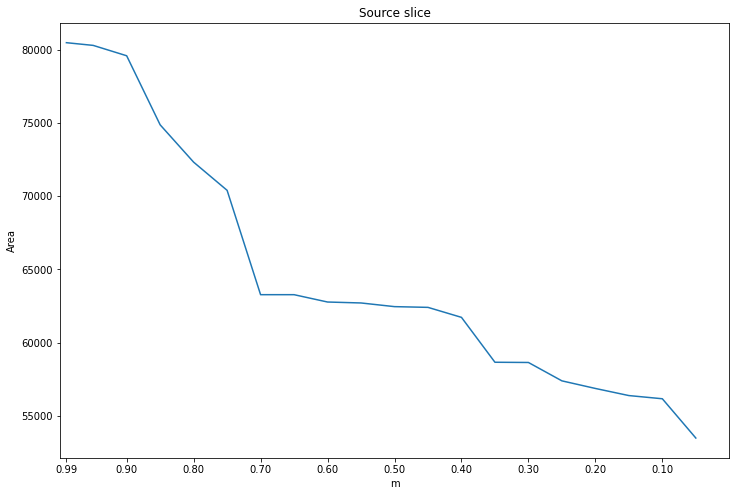

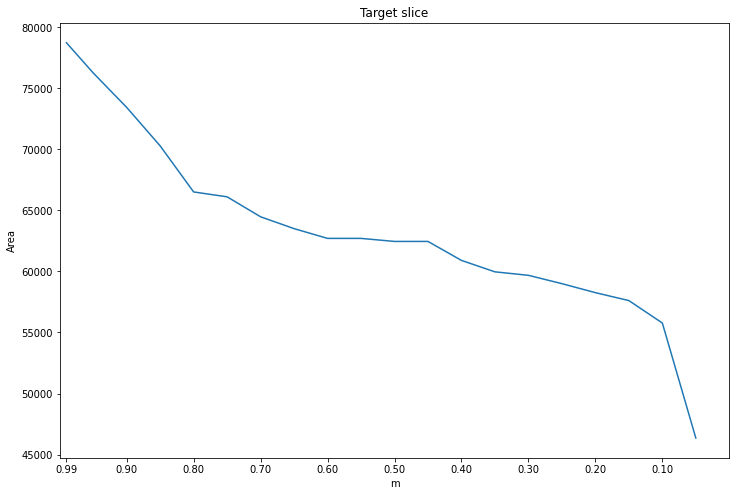

In [35]:
sliceA_areas = []
sliceB_areas = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    print("m = " + str(m))
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)

In [ ]:
***
151673_00 - 151674_10
m=0.9
***

In [42]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.5920E+7
Iteration: 1 | deviance=1.5916E+7
Iteration: 2 | deviance=1.3900E+7
Iteration: 3 | deviance=1.3490E+7
Iteration: 4 | deviance=1.3330E+7
Iteration: 5 | deviance=1.3250E+7
Iteration: 6 | deviance=1.3205E+7
Iteration: 7 | deviance=1.3177E+7
Iteration: 8 | deviance=1.3157E+7
Iteration: 9 | deviance=1.3143E+7
Iteration: 10 | deviance=1.3133E+7
Iteration: 11 | deviance=1.3124E+7
Iteration: 12 | deviance=1.3116E+7
Iteration: 13 | deviance=1.3110E+7
Iteration: 14 | deviance=1.3105E+7
Iteration: 15 | deviance=1.3100E+7
Iteration: 16 | deviance=1.3096E+7
Iteration: 17 | deviance=1.3093E+7
Iteration: 18 | deviance=1.3090E+7
Iteration: 19 | deviance=1.3087E+7
Iteration: 20 | deviance=1.3085E+7
Iteration: 21 | deviance=1.3083E+7
Iteration: 22 | deviance=1.3081E+7
Iteration: 23 | deviance=1.3079E+7
Iteration: 24 | deviance=1.3077E+7
Iteration: 25 | deviance=1.3076E+7
Iteration: 26 | deviance=1.3075E+7
GLM-PCA finished with joint matrix shape (651

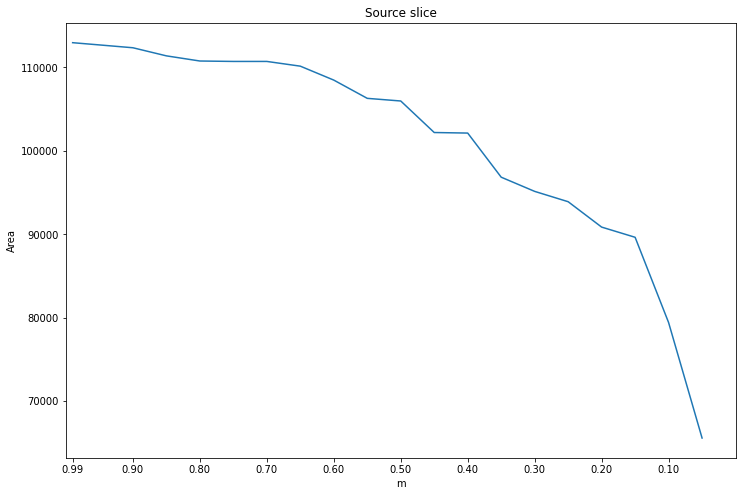

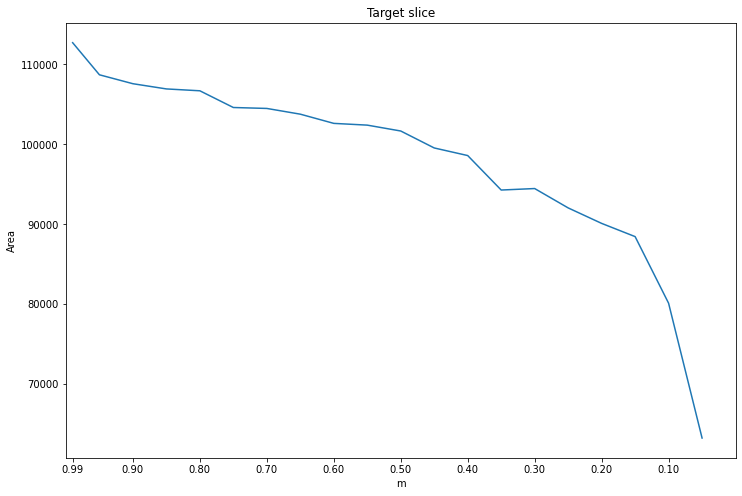

In [43]:
sliceA_areas = []
sliceB_areas = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)

In [ ]:
***
151673_00 - 151674_01
m=0.5
***

In [36]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=7.9526E+6
Iteration: 1 | deviance=7.9521E+6
Iteration: 2 | deviance=7.4042E+6
Iteration: 3 | deviance=7.1836E+6
Iteration: 4 | deviance=7.0756E+6
Iteration: 5 | deviance=7.0159E+6
Iteration: 6 | deviance=6.9815E+6
Iteration: 7 | deviance=6.9603E+6
Iteration: 8 | deviance=6.9453E+6
Iteration: 9 | deviance=6.9341E+6
Iteration: 10 | deviance=6.9252E+6
Iteration: 11 | deviance=6.9181E+6
Iteration: 12 | deviance=6.9123E+6
Iteration: 13 | deviance=6.9075E+6
Iteration: 14 | deviance=6.9034E+6
Iteration: 15 | deviance=6.9000E+6
Iteration: 16 | deviance=6.8971E+6
Iteration: 17 | deviance=6.8946E+6
Iteration: 18 | deviance=6.8924E+6
Iteration: 19 | deviance=6.8904E+6
Iteration: 20 | deviance=6.8887E+6
Iteration: 21 | deviance=6.8871E+6
Iteration: 22 | deviance=6.8857E+6
Iteration: 23 | deviance=6.8844E+6
Iteration: 24 | deviance=6.8833E+6
Iteration: 25 | deviance=6.8822E+6
Iteration: 26 | deviance=6.8813E+6
Iteration: 27 | deviance=6.8804E+6
Iteration:

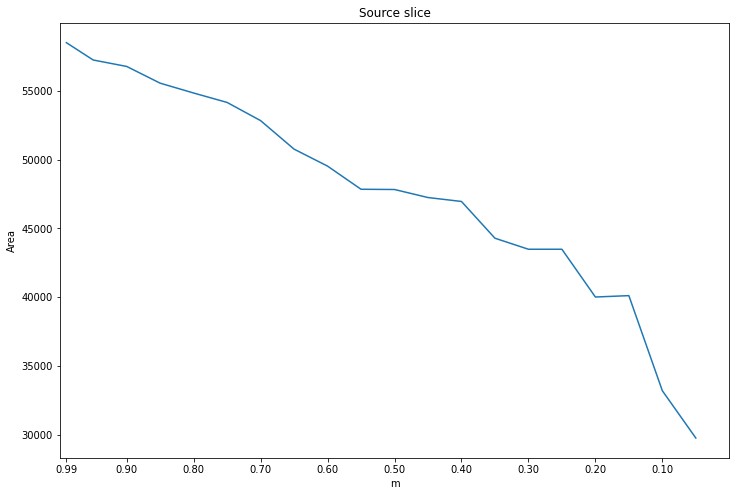

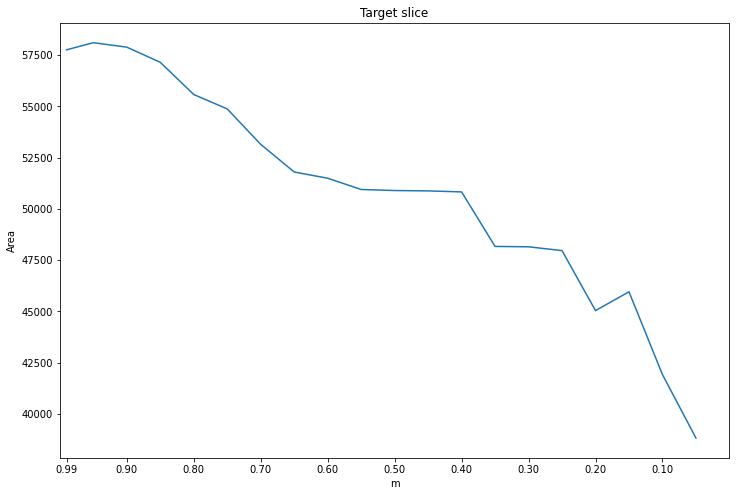

In [37]:
sliceA_areas = []
sliceB_areas = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)

In [ ]:
***
151673_00 - 151674_01
m=0.7
***

In [38]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.1158E+7
Iteration: 1 | deviance=1.1158E+7
Iteration: 2 | deviance=1.0085E+7
Iteration: 3 | deviance=9.7988E+6
Iteration: 4 | deviance=9.6756E+6
Iteration: 5 | deviance=9.6190E+6
Iteration: 6 | deviance=9.5883E+6
Iteration: 7 | deviance=9.5685E+6
Iteration: 8 | deviance=9.5543E+6
Iteration: 9 | deviance=9.5433E+6
Iteration: 10 | deviance=9.5347E+6
Iteration: 11 | deviance=9.5277E+6
Iteration: 12 | deviance=9.5218E+6
Iteration: 13 | deviance=9.5169E+6
Iteration: 14 | deviance=9.5128E+6
Iteration: 15 | deviance=9.5092E+6
Iteration: 16 | deviance=9.5060E+6
Iteration: 17 | deviance=9.5033E+6
Iteration: 18 | deviance=9.5009E+6
Iteration: 19 | deviance=9.4987E+6
Iteration: 20 | deviance=9.4967E+6
Iteration: 21 | deviance=9.4950E+6
Iteration: 22 | deviance=9.4934E+6
Iteration: 23 | deviance=9.4919E+6
Iteration: 24 | deviance=9.4906E+6
Iteration: 25 | deviance=9.4893E+6
Iteration: 26 | deviance=9.4882E+6
Iteration: 27 | deviance=9.4871E+6
Iteration:

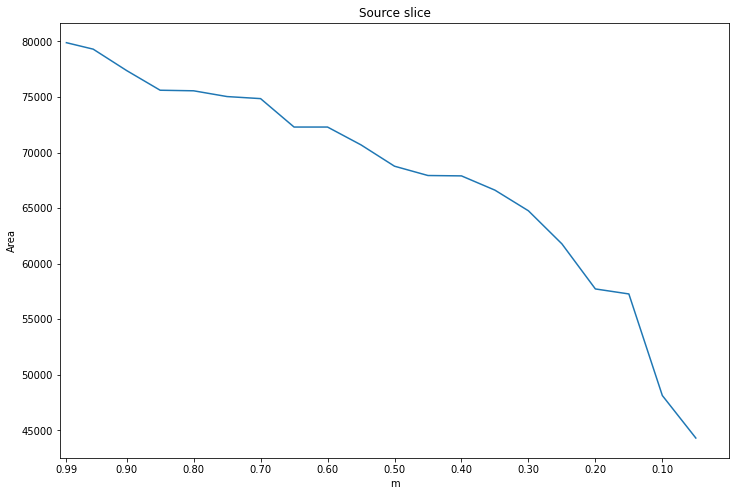

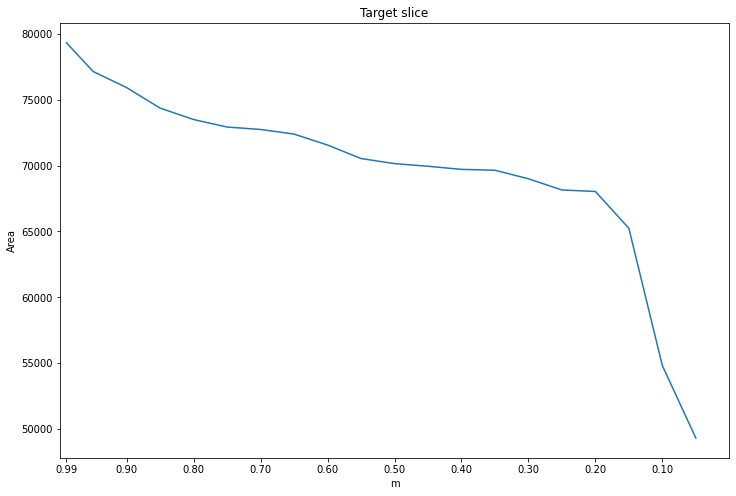

In [39]:
sliceA_areas = []
sliceB_areas = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)

In [ ]:
***
151673_00 - 151674_01
m=0.9
***

In [40]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.6159E+7
Iteration: 1 | deviance=1.6157E+7
Iteration: 2 | deviance=1.4215E+7
Iteration: 3 | deviance=1.3834E+7
Iteration: 4 | deviance=1.3675E+7
Iteration: 5 | deviance=1.3598E+7
Iteration: 6 | deviance=1.3554E+7
Iteration: 7 | deviance=1.3527E+7
Iteration: 8 | deviance=1.3507E+7
Iteration: 9 | deviance=1.3493E+7
Iteration: 10 | deviance=1.3482E+7
Iteration: 11 | deviance=1.3473E+7
Iteration: 12 | deviance=1.3465E+7
Iteration: 13 | deviance=1.3459E+7
Iteration: 14 | deviance=1.3454E+7
Iteration: 15 | deviance=1.3449E+7
Iteration: 16 | deviance=1.3445E+7
Iteration: 17 | deviance=1.3442E+7
Iteration: 18 | deviance=1.3439E+7
Iteration: 19 | deviance=1.3436E+7
Iteration: 20 | deviance=1.3434E+7
Iteration: 21 | deviance=1.3432E+7
Iteration: 22 | deviance=1.3430E+7
Iteration: 23 | deviance=1.3428E+7
Iteration: 24 | deviance=1.3426E+7
Iteration: 25 | deviance=1.3425E+7
Iteration: 26 | deviance=1.3423E+7
GLM-PCA finished with joint matrix shape (666

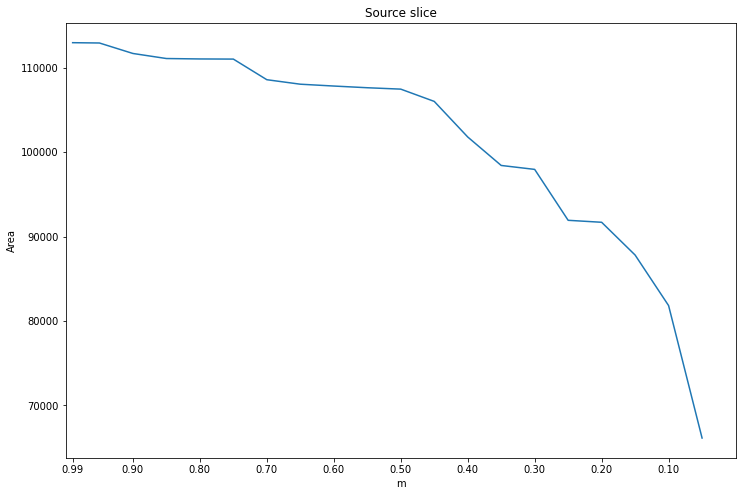

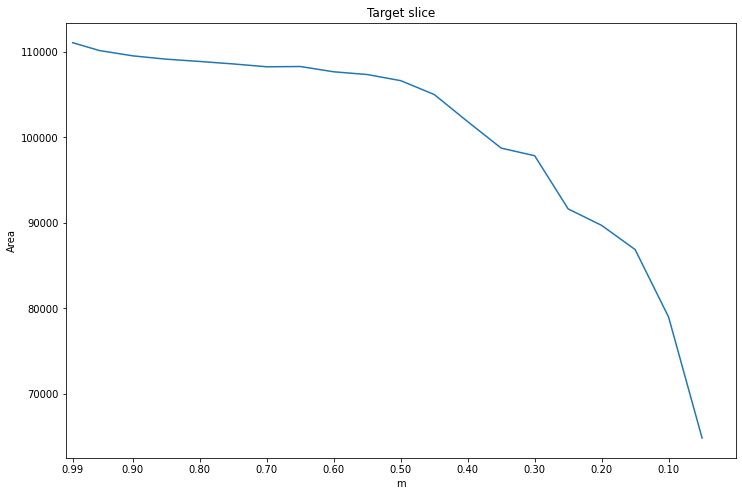

In [41]:
sliceA_areas = []
sliceB_areas = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)

In [ ]:
***
sim00-10
m=0.3
delta=0.1
***

In [44]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=7.3866E+6
Iteration: 1 | deviance=7.3865E+6
Iteration: 2 | deviance=6.6799E+6
Iteration: 3 | deviance=6.4274E+6
Iteration: 4 | deviance=6.3126E+6
Iteration: 5 | deviance=6.2531E+6
Iteration: 6 | deviance=6.2176E+6
Iteration: 7 | deviance=6.1934E+6
Iteration: 8 | deviance=6.1758E+6
Iteration: 9 | deviance=6.1622E+6
Iteration: 10 | deviance=6.1516E+6
Iteration: 11 | deviance=6.1430E+6
Iteration: 12 | deviance=6.1359E+6
Iteration: 13 | deviance=6.1300E+6
Iteration: 14 | deviance=6.1250E+6
Iteration: 15 | deviance=6.1206E+6
Iteration: 16 | deviance=6.1169E+6
Iteration: 17 | deviance=6.1136E+6
Iteration: 18 | deviance=6.1107E+6
Iteration: 19 | deviance=6.1082E+6
Iteration: 20 | deviance=6.1059E+6
Iteration: 21 | deviance=6.1038E+6
Iteration: 22 | deviance=6.1019E+6
Iteration: 23 | deviance=6.1002E+6
Iteration: 24 | deviance=6.0986E+6
Iteration: 25 | deviance=6.0971E+6
Iteration: 26 | deviance=6.0958E+6
Iteration: 27 | deviance=6.0945E+6
Iteration:

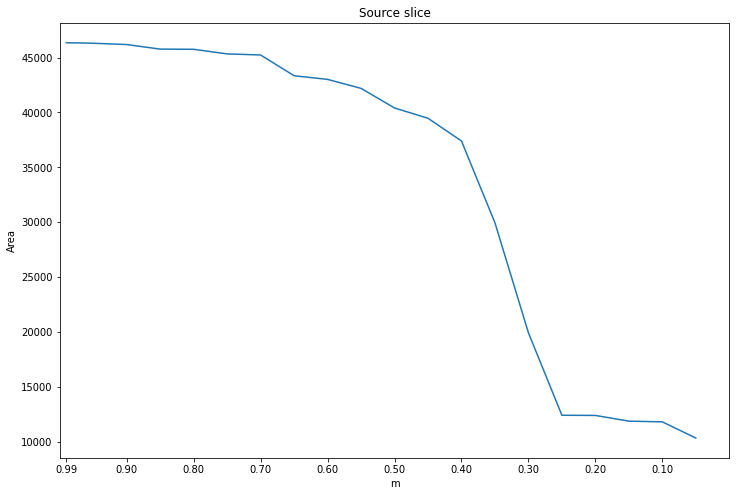

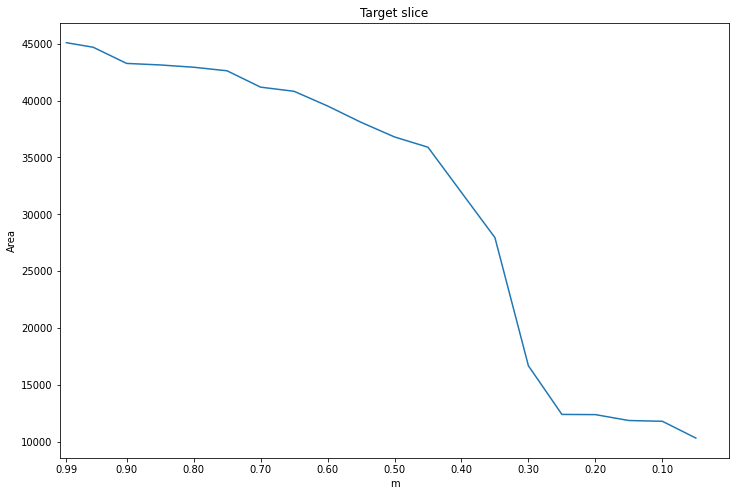

In [45]:
sliceA_areas = []
sliceB_areas = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)

In [ ]:
***
sim00-10
m=0.5
delta=0.1
***

In [3]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=9.6993E+6
Iteration: 1 | deviance=9.6991E+6
Iteration: 2 | deviance=8.7879E+6
Iteration: 3 | deviance=8.4907E+6
Iteration: 4 | deviance=8.3554E+6
Iteration: 5 | deviance=8.2877E+6
Iteration: 6 | deviance=8.2475E+6
Iteration: 7 | deviance=8.2211E+6
Iteration: 8 | deviance=8.2021E+6
Iteration: 9 | deviance=8.1876E+6
Iteration: 10 | deviance=8.1762E+6
Iteration: 11 | deviance=8.1669E+6
Iteration: 12 | deviance=8.1593E+6
Iteration: 13 | deviance=8.1530E+6
Iteration: 14 | deviance=8.1477E+6
Iteration: 15 | deviance=8.1431E+6
Iteration: 16 | deviance=8.1392E+6
Iteration: 17 | deviance=8.1358E+6
Iteration: 18 | deviance=8.1329E+6
Iteration: 19 | deviance=8.1303E+6
Iteration: 20 | deviance=8.1280E+6
Iteration: 21 | deviance=8.1259E+6
Iteration: 22 | deviance=8.1241E+6
Iteration: 23 | deviance=8.1224E+6
Iteration: 24 | deviance=8.1209E+6
Iteration: 25 | deviance=8.1195E+6
Iteration: 26 | deviance=8.1183E+6
Iteration: 27 | deviance=8.1171E+6
Iteration:

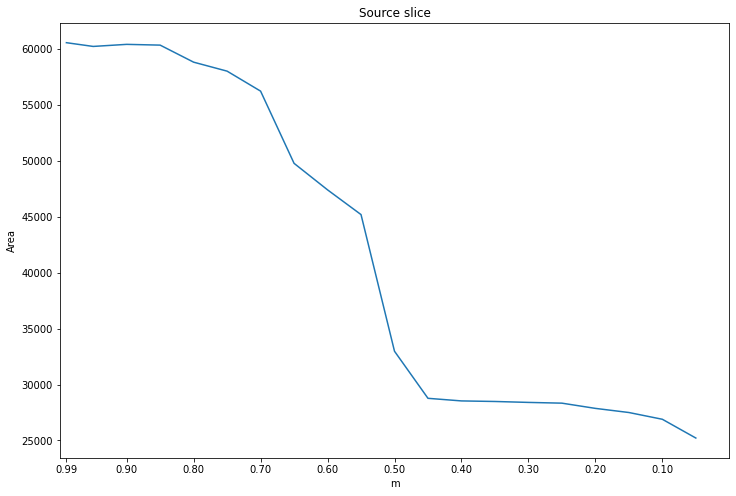

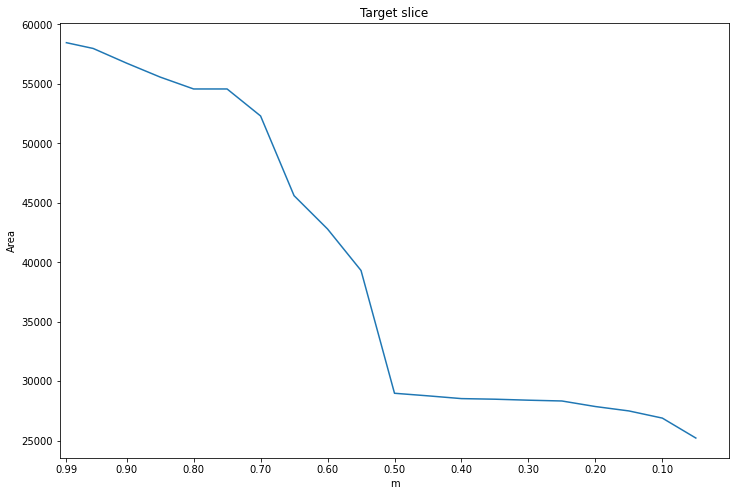

In [4]:
sliceA_areas = []
sliceB_areas = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)

In [ ]:
***
sim00-10
m=0.9
delta=0.1
***

In [ ]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.9_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.9_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

In [ ]:
sliceA_areas = []
sliceB_areas = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)